In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
features = np.array(([0.1, 0.5, 0.2], 
                     [0.2, 0.3, 0.1], 
                     [0.7, 0.4, 0.2], 
                     [0.1, 0.4, 0.3]))
print(features)

[[0.1 0.5 0.2]
 [0.2 0.3 0.1]
 [0.7 0.4 0.2]
 [0.1 0.4 0.3]]


In [3]:
weights = np.array([0.4, 0.2, 0.6])
targets = np.array([1,0,1,0])
bias = 0.5
learning_rate = 0.1

In [4]:
def perceptron(feature, weight, bias):
    weighted_sum = np.dot(feature, weight)    
    #return sigmoid(weighted_sum + bias)
    return weighted_sum + bias

In [5]:
def sigmoid(weighted_sum):
    return 1 / (1 + np.exp(-weighted_sum))

In [6]:
#Loss calculation
def cross_entropy(p, y):
    return -(y*np.log10(p) + (1 - y) * (np.log10(1 - p)))

In [7]:
# apply gradient descent to update weights and bias value

def gradient_descent(feature, weights, bias, target, predict_val, learning_rate):
    new_weights = []
    # update bias
    #formula: new_bias = old_bias + learning_rate x (target - predict) 
    bias = bias + learning_rate * (target - predict_val)
    
    #update weights
    #formula: new_w = old_w + learning_rate x (target - predict) x feature[i]
    for x, old_w in zip(feature, weights):
        new_w = old_w + learning_rate * (target - predict_val) * x
        new_weights.append(new_w)
    
    return new_weights, bias

In [8]:
epoch_loss = [] 

#Gradient Descent steps over 10 epoch
for epoch in range(20):
    
    # Create Neural Network Model
    for f_input, target  in zip(features, targets):
        
        #print("---------------------------")
        weighted_sum = perceptron(f_input, weights, bias)
        #print("Weighted_sum:", weighted_sum)

        predicted_value = sigmoid(weighted_sum)
        #print("Predicted value: ", predicted_value)

        #print("Loss: ", cross_entropy(predicted_value, target)) 

        weights, bias = gradient_descent(f_input, weights, bias, target, predicted_value, learning_rate)
        #print("Updated weight : {}, Update bias : {}".format(weights, bias))
        #print("---------------------------")
    
    # Calculate and print average loss
    predictions = sigmoid(perceptron(features, weights, bias))
    average_loss = np.mean(cross_entropy(predictions, targets))
    epoch_loss.append(average_loss)
    
    print("***************************************************")
    print("EPOCH ", epoch)
    print("***************************************************")
    print("Average Loss: ", average_loss)

***************************************************
EPOCH  0
***************************************************
Average Loss:  0.3164358277972713
***************************************************
EPOCH  1
***************************************************
Average Loss:  0.3109535933882859
***************************************************
EPOCH  2
***************************************************
Average Loss:  0.3065056292993456
***************************************************
EPOCH  3
***************************************************
Average Loss:  0.3028928070377662
***************************************************
EPOCH  4
***************************************************
Average Loss:  0.29994814154892113
***************************************************
EPOCH  5
***************************************************
Average Loss:  0.29753404460600147
***************************************************
EPOCH  6
***************************************************
Ave

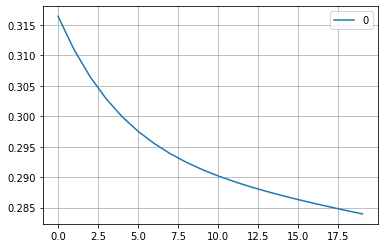

In [25]:
#plot the average loss

df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind='line', grid=True).get_figure()
plt.show(df_plot)